#**Sparks Foundation - Data Science and Business Analytics**

#**Task 6**

#**Author - Jerome Shijo**

#**GRIP@The Sparks Foundation**

**Objective** - Create the Decision Tree clasifier and visualize it graphically

###**1) Importing Libraries and Datasets**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


In [3]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [4]:
iris = datasets.load_iris()
dataset = pd.DataFrame(iris.data, columns = iris.feature_names)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
dataset_np = dataset.iloc[:,:].values

###**2) Exploring the Dataset**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
sepal_length =  dataset.iloc[:,0]
sepal_width = dataset.iloc[:,1]
petal_length = dataset.iloc[:,2]
petal_width = dataset.iloc[:,3]
dataset_np = dataset.iloc[:,[0,1,2,3]].values

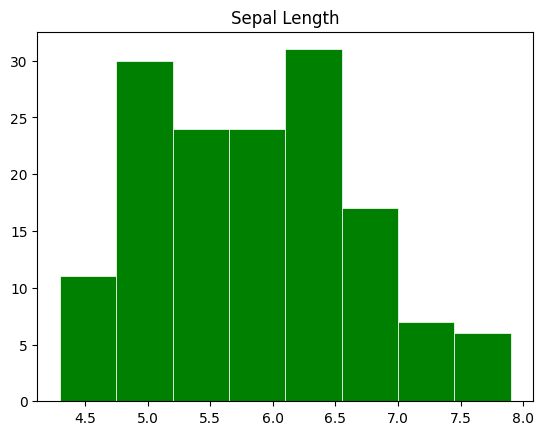

In [8]:
plt.hist(sepal_length,bins=8, linewidth=0.5, edgecolor="white",color='green')
plt.title("Sepal Length")
plt.show()

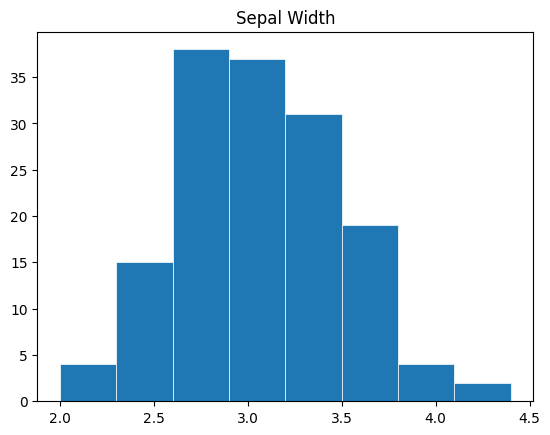

In [9]:
plt.hist(sepal_width,bins=8, linewidth=0.5, edgecolor="white")
plt.title("Sepal Width")
plt.show()

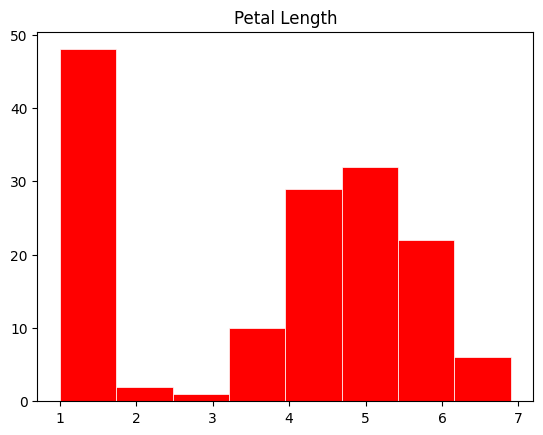

In [10]:
plt.hist(petal_length,bins=8, linewidth=0.5, edgecolor="white",color='red')
plt.title("Petal Length")
plt.show()

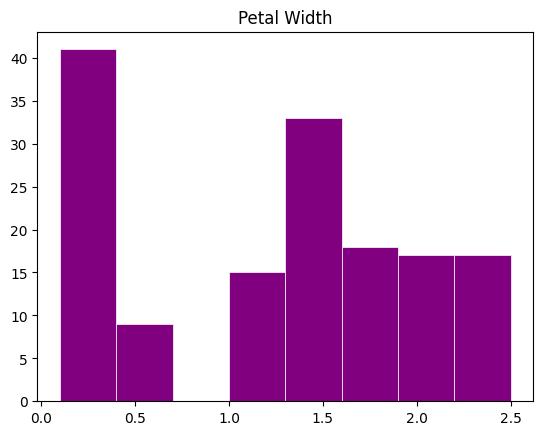

In [11]:
plt.hist(petal_width,bins=8, linewidth=0.5, edgecolor="white",color='purple')
plt.title("Petal Width")
plt.show()

###**3) Visualizing The Decision Tree**

In [12]:
X = dataset.iloc[:,:].values
y = iris.target
decision_tree = DecisionTreeClassifier()
# decision_tree.fit()

In [13]:
X[0:5]  # head of dataset

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [14]:
y  # values of dataset

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

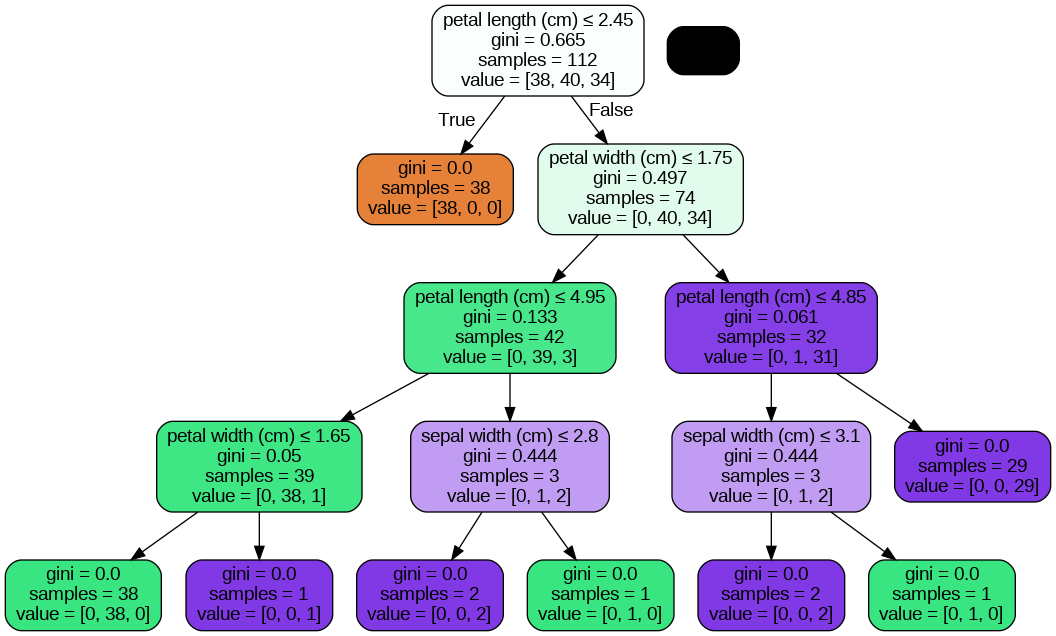

In [24]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data, feature_names=iris.feature_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

###**4) Testing the Algorithm**

In [17]:
y_pred = decision_tree.predict(X_test)

In [26]:
y_test

array([2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2])

In [27]:
y_pred

array([2, 1, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1])

In [18]:
accurate=0
for i in range(len(y_test)):
  if (y_test[i]==y_pred[i]):
    accurate+=1
print("Accuracy of Testing Data: ",(accurate/i)*100,"%")

Accuracy of Testing Data:  100.0 %


# **Thank you**